# Import Dataset

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv(r"C:\Users\PC1\Desktop\DS\DataSets\Admission_Predict_Ver1.1.csv") #reading file from device

In [3]:
df #verifying read

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
495,496,332,108,5,4.5,4.0,9.02,1,0.87
496,497,337,117,5,5.0,5.0,9.87,1,0.96
497,498,330,120,5,4.5,5.0,9.56,1,0.93
498,499,312,103,4,4.0,5.0,8.43,0,0.73


In [4]:
df.columns #showing name of all columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

# Data Pre-processing

In [5]:
from sklearn.preprocessing import Binarizer

In [6]:
bi = Binarizer(threshold=0.80)  # for changing values >0.8 to 1 & <0.8 to 0

In [8]:
df['Chance of Admit '] = bi.fit_transform(df[['Chance of Admit ']]) #transformation

In [9]:
df #verifying changes

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,1.0
1,2,324,107,4,4.0,4.5,8.87,1,0.0
2,3,316,104,3,3.0,3.5,8.00,1,0.0
3,4,322,110,3,3.5,2.5,8.67,1,0.0
4,5,314,103,2,2.0,3.0,8.21,0,0.0
...,...,...,...,...,...,...,...,...,...
495,496,332,108,5,4.5,4.0,9.02,1,1.0
496,497,337,117,5,5.0,5.0,9.87,1,1.0
497,498,330,120,5,4.5,5.0,9.56,1,1.0
498,499,312,103,4,4.0,5.0,8.43,0,0.0


In [10]:
x = df.drop('Chance of Admit ', axis=1) #A DataFrame object has two axes: “axis 0” and “axis 1”. “axis 0” represents rows and “axis 1” represents columns.
y = df['Chance of Admit ']

In [11]:
x

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,1,337,118,4,4.5,4.5,9.65,1
1,2,324,107,4,4.0,4.5,8.87,1
2,3,316,104,3,3.0,3.5,8.00,1
3,4,322,110,3,3.5,2.5,8.67,1
4,5,314,103,2,2.0,3.0,8.21,0
...,...,...,...,...,...,...,...,...
495,496,332,108,5,4.5,4.0,9.02,1
496,497,337,117,5,5.0,5.0,9.87,1
497,498,330,120,5,4.5,5.0,9.56,1
498,499,312,103,4,4.0,5.0,8.43,0


In [12]:
y

0      1.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
495    1.0
496    1.0
497    1.0
498    0.0
499    1.0
Name: Chance of Admit , Length: 500, dtype: float64

In [13]:
 y.value_counts() #count in number format

0.0    358
1.0    142
Name: Chance of Admit , dtype: int64

# Data Split

In [14]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 0, test_size = 0.2)

In [15]:
x_train.shape

(400, 8)

In [16]:
y_train.shape

(400,)

In [17]:
x_test.shape

(100, 8)

In [18]:
y_test.shape

(100,)

# Model Building

In [20]:
from sklearn.tree import DecisionTreeClassifier

In [21]:
classifier = DecisionTreeClassifier(random_state=0)

In [22]:
classifier.fit(x_train, y_train)

DecisionTreeClassifier(random_state=0)

In [23]:
y_pred = classifier.predict(x_test) #predeicting using model built

In [24]:
result = pd.DataFrame({
    'actual': y_test,
    'predicted' : y_pred
}) #visualising actual & predicted data

In [25]:
result

,actual,predicted
90,0.0,0.0
254,1.0,1.0
283,0.0,0.0
445,1.0,1.0
461,0.0,0.0
...,...,...
372,1.0,1.0
56,0.0,0.0
440,0.0,0.0
60,0.0,0.0


# Model Evaluation

In [26]:
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score, classification_report

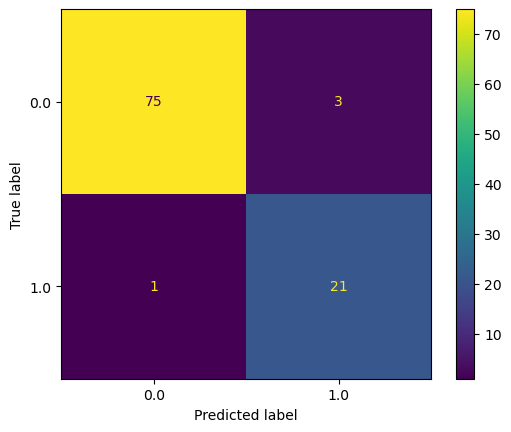

In [27]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

In [28]:
accuracy_score(y_test, y_pred)

0.96

In [29]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.99      0.96      0.97        78
         1.0       0.88      0.95      0.91        22

    accuracy                           0.96       100
   macro avg       0.93      0.96      0.94       100
weighted avg       0.96      0.96      0.96       100



# Printing Decision Tree

In [30]:
from sklearn.tree import plot_tree

In [32]:
import matplotlib.pyplot as plt

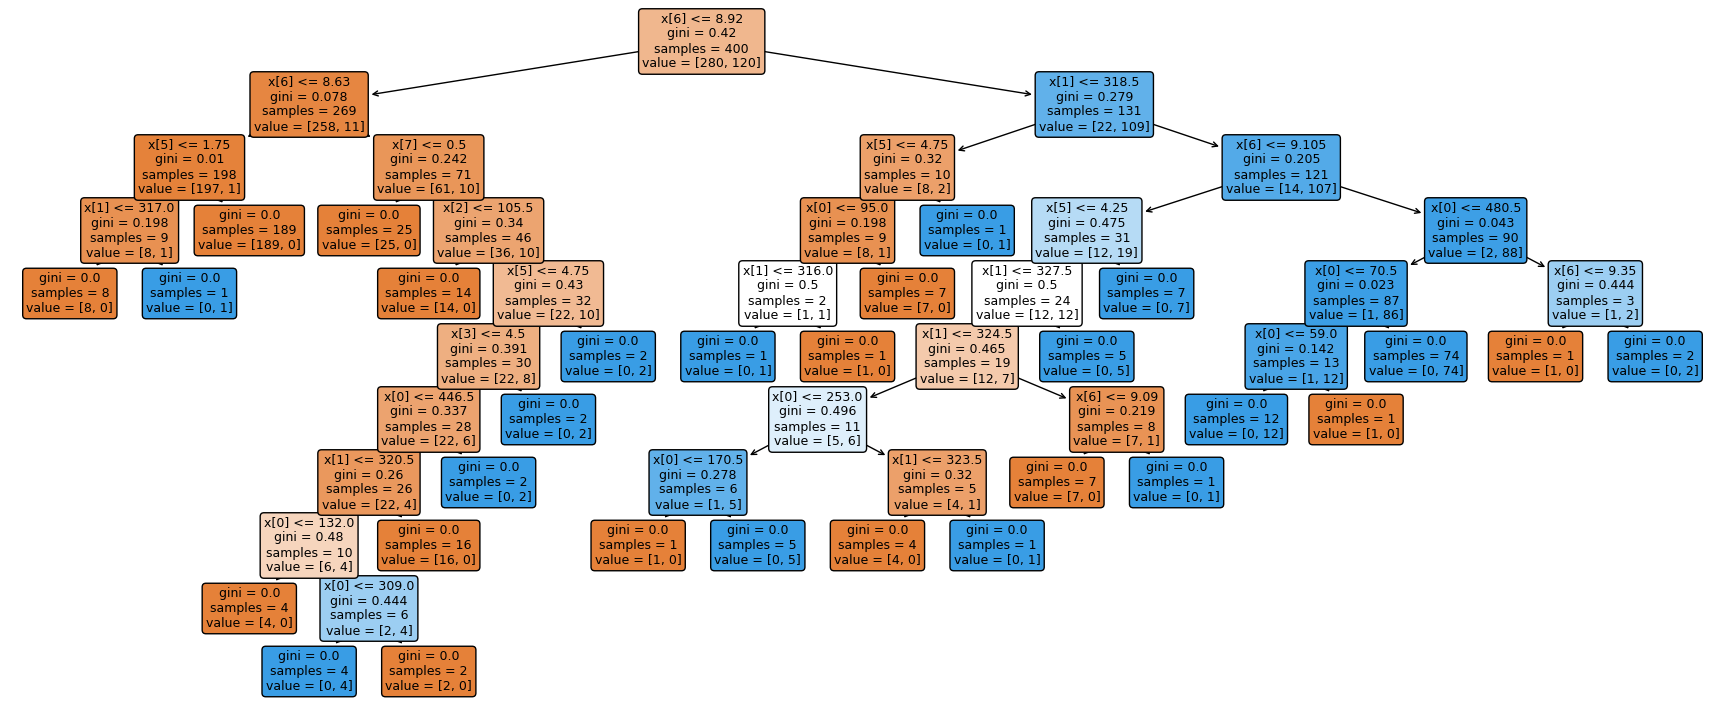

In [33]:
plt.figure(figsize=(22,9))
plot_tree(classifier, fontsize = 9, filled=True, rounded=True);

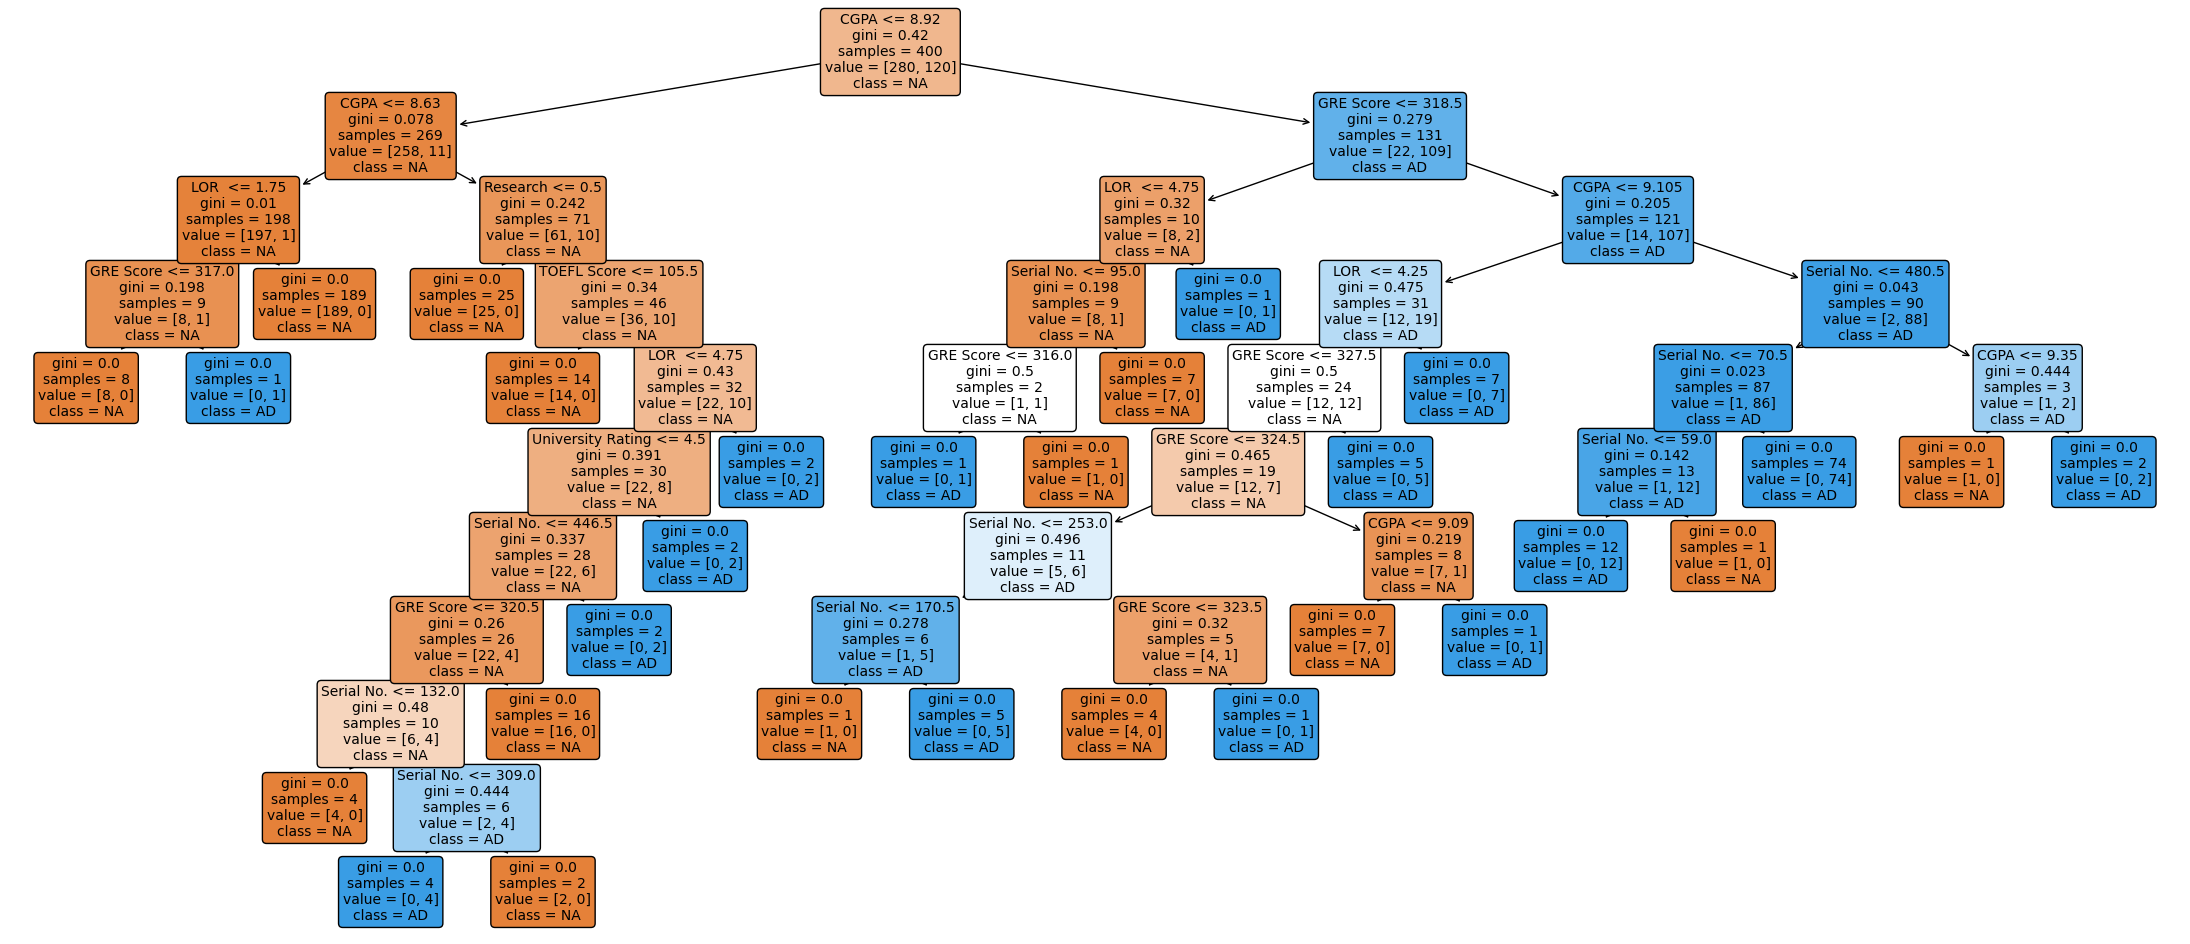

In [34]:
plt.figure(figsize=(28,12))
plot_tree(classifier, fontsize = 10, filled=True, rounded=True, feature_names=x.columns, class_names=['NA', 'AD']);